In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch 
import torch.nn as nn 
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(42)

In [3]:
df = pd.read_csv("fmnist_small.csv")
df.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


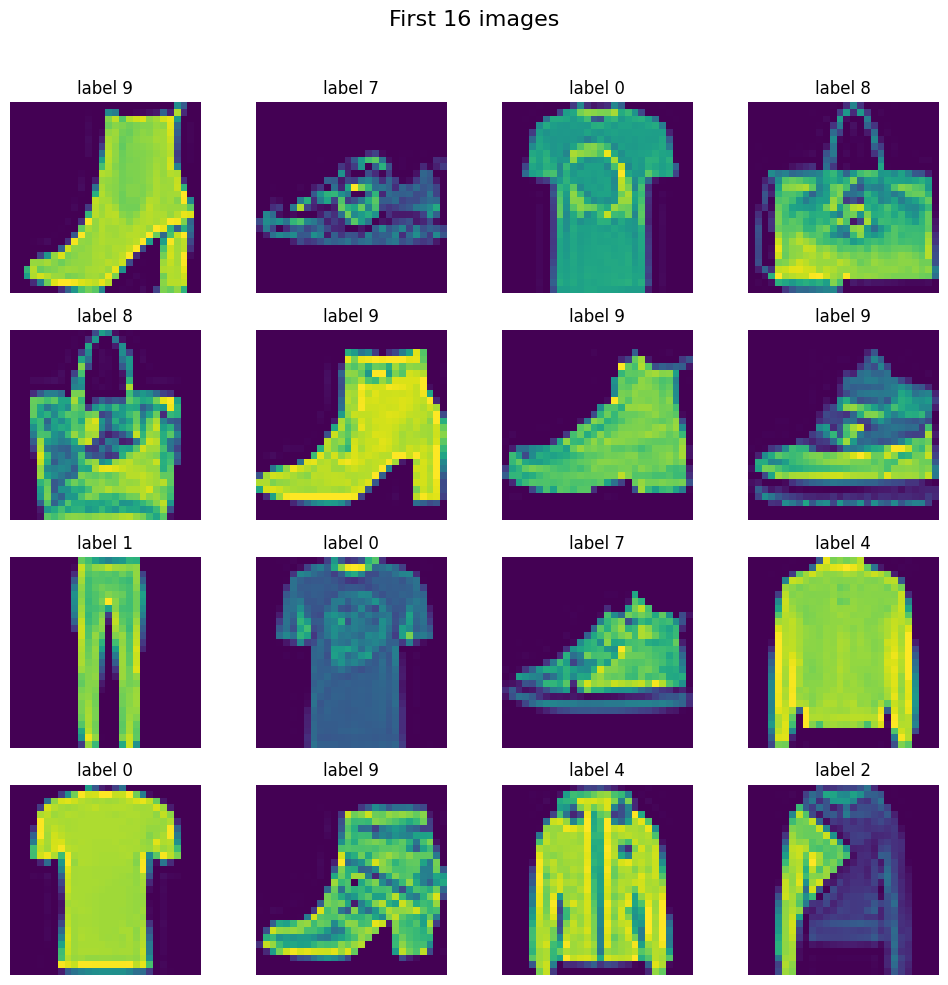

In [4]:
fig, axes = plt.subplots(4,4, figsize=(10,10))
fig.suptitle("First 16 images", fontsize =16)

for i, ax in enumerate(axes.flat):
    img = df.iloc[i,1:].values.reshape(28,28)
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(f"label {df.iloc[i,0]}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [5]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]
X,Y

(      pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0          0       0       0       0       0       0       0       0       0   
 1          0       0       0       0       0       0       0       0       0   
 2          0       0       0       0       0       1       0       0       0   
 3          0       0       0       0       0       0       0       0       0   
 4          0       0       0       0       0       0       0       0       0   
 ...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
 5995       0       0       0       0       0       0       0       0       0   
 5996       0       0       0       0       0       0       0       0       0   
 5997       0       0       0       0       0       0       0       0       0   
 5998       0       0       0       0       0       0       0       0       0   
 5999       0       0       0       0       0       0       0       0       0   
 
       pixel10  ...  pixel

In [6]:
X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.20, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4800, 784), (1200, 784), (4800,), (1200,))

In [7]:
X_train = X_train/255.0
X_test = X_test/255.0


## train model

In [8]:
class my_dataset(Dataset):
    def __init__(self, features, label):
        self.features = features
        self.label = label
        self.features = torch.tensor(self.features, dtype=torch.float32)
        self.label = torch.tensor(self.label, dtype= torch.long)

    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, index):
        return self.features[index], self.label[index]

In [9]:
train_dataset = my_dataset(X_train.values, y_train)
len(train_dataset)

4800

In [10]:
y_train.values

array([7, 6, 7, ..., 0, 8, 6], shape=(4800,))

In [11]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [12]:
test_dataset = my_dataset(X_test.values, y_test.values)
test_dataset

In [13]:
test_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [14]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)
train_loader

In [15]:
test_loader

In [16]:
class my_module(nn.Module):
    
    def __init__(self, num_features):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(num_features, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),

            nn.Dropout(p=0.3),

            nn.Linear(128,64),
            nn.BatchNorm1d(64),
            nn.ReLU(),

            nn.Linear(64,10)
        )
    def forward(self, x):
        return self.model(x)


In [17]:
learning_rate = 0.001
epoches = 10

In [18]:
## Model defination
Model = my_module(X_train.shape[1])

In [19]:
Model

my_module(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [20]:
## Loss function 
criterion = nn.CrossEntropyLoss()

## Optimizer
optimizer = optim.SGD(Model.parameters(), lr = learning_rate)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [21]:
## Optimizer
optimizer = optim.SGD(Model.parameters(), lr = learning_rate, weight_decay=1e-4)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0.0001
)

In [22]:
for epoch in range(epoches):
    total_epoches_loss = 0 

    for batch_features, batch_label in train_loader:
        ## Forward Pass
        out = Model(batch_features)

        ## Losses 
        losses = criterion(out, batch_label)

        optimizer.zero_grad()

        losses.backward()

        optimizer.step()

        total_epoches_loss += losses.item()

    avg_batch_loss = total_epoches_loss / len(train_loader)
    print("Average Batch Loss : ",avg_batch_loss)

Average Batch Loss :  2.0973384960492454
Average Batch Loss :  1.7304572200775146
Average Batch Loss :  1.5688386352856953
Average Batch Loss :  1.4604294482866924
Average Batch Loss :  1.3815642388661702
Average Batch Loss :  1.300243260860443
Average Batch Loss :  1.2487069177627563
Average Batch Loss :  1.2021177812417347
Average Batch Loss :  1.1527577209472657
Average Batch Loss :  1.1130046530564626


In [23]:
## Model evaluation
Model.eval()

my_module(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [24]:
## Evaluation for test data
total = 0
correct = 0
with torch.no_grad():
    for batch_features, batch_label in test_loader:
        out = Model(batch_features)
        _, predicted = torch.max(out, 1)
        total += batch_label.shape[0]
        correct += (predicted == batch_label).sum().item()
    print(correct/total)

0.7325


In [25]:
len(test_loader)

38

In [47]:
class my_nn(nn.Module):
    def __init__(self, input_dim, output_dim, num_hidden_layer, neurons_per_layer):
        super().__init__()
        layers = []
        for i in range(num_hidden_layer):
            layers.append(nn.Linear(input_dim,neurons_per_layer))
            layers.append(nn.BatchNorm1d(neurons_per_layer))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(0.3))
            input_dim = neurons_per_layer
        
        layers.append(nn.Linear(neurons_per_layer, output_dim))
        
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)
        

In [59]:
### objevtive function

def objective(trial):

    ### next hyperparameter value from the search space 
    num_hidden_layer = trial.suggest_int("num_hidden_layers",1,5)
    neurons_per_layer = trial.suggest_int("neurons_per_layer",8,128,step=8)

    ## Model init
    input_dim = 784
    output_dim = 10
    
    ## Modle 
    model = my_nn(input_dim, output_dim, num_hidden_layer, neurons_per_layer)
    # model.to(device)

    ## parameters init
    learning_rate = 0.01
    epochs = 100

    ###
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay =1e-4)

    ## training loops

    for epoch in range(epochs):
        total_epoch_loss = 0

        for batch_features, batch_label in train_loader:
            
            ## Move data to gpu
            # batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

            ## forward pass
            outputs = model(batch_features)

            ## calculate loss 
            loss = criterion(outputs, batch_label)

            ## back pass
            optimizer.zero_grad()
            loss.backward()

            ## updates grads
            optimizer.step()
        
    ## evaluation 
    model.eval()
    total = 0
    correct = 0

    with torch.no_grad():
        for batch_features, batch_label in test_loader:
            # batch_features, batch_label = batch_features.to(device), batch_label.to(device)

            ## 
            outputs = model(batch_features)

            _, predicted = torch.max(outputs, 1)

            total += batch_label.shape[0]

            correct = correct + (predicted == batch_label).sum().item()
    print(total, correct)
    accuracy = correct/total

    return accuracy

In [32]:
pip install optuna

  Using cached optuna-4.2.0-py3-none-any.whl.metadata (17 kB)
  Using cached alembic-1.14.1-py3-none-any.whl.metadata (7.4 kB)
  Using cached colorlog-6.9.0-py3-none-any.whl.metadata (10 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached Mako-1.3.8-py3-none-any.whl.metadata (2.9 kB)
Using cached optuna-4.2.0-py3-none-any.whl (383 kB)
Using cached alembic-1.14.1-py3-none-any.whl (233 kB)
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.1 MB ? eta -:--:--
   -------------- ------------------------- 0.8/2.1 MB 1.3 MB/s eta 0:00:02
   ------------------- -------------------- 1.0/2.1 MB 1.2 MB/s eta 0:00:01
   ------------------------ --------------- 1.3/2.1 MB 1.3 MB/s eta 0:00:01
   ----------------------------- ---------- 1.6/2.1 MB 1.3 MB/s eta 0:00:01
   ---------------------------------- ----- 1.8/2.1 MB 1.2 MB/s eta 0:

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [60]:
import optuna

In [61]:
study = optuna.create_study(direction="maximize")

[I 2025-01-22 09:58:20,576] A new study created in memory with name: no-name-3efa4b5a-bedb-41df-89c4-66600f578d7d


In [62]:
study

In [63]:
study.optimize(objective, n_trials=10)

[I 2025-01-22 09:59:12,849] Trial 0 finished with value: 0.8333333333333334 and parameters: {'num_hidden_layers': 3, 'neurons_per_layer': 80}. Best is trial 0 with value: 0.8333333333333334.


1200 1000


[I 2025-01-22 10:00:11,522] Trial 1 finished with value: 0.8183333333333334 and parameters: {'num_hidden_layers': 5, 'neurons_per_layer': 40}. Best is trial 0 with value: 0.8333333333333334.


1200 982


[I 2025-01-22 10:01:08,192] Trial 2 finished with value: 0.835 and parameters: {'num_hidden_layers': 4, 'neurons_per_layer': 72}. Best is trial 2 with value: 0.835.


1200 1002


[I 2025-01-22 10:02:05,408] Trial 3 finished with value: 0.8041666666666667 and parameters: {'num_hidden_layers': 5, 'neurons_per_layer': 32}. Best is trial 2 with value: 0.835.


1200 965


[I 2025-01-22 10:02:48,652] Trial 4 finished with value: 0.8458333333333333 and parameters: {'num_hidden_layers': 2, 'neurons_per_layer': 104}. Best is trial 4 with value: 0.8458333333333333.


1200 1015


[I 2025-01-22 10:03:47,539] Trial 5 finished with value: 0.8275 and parameters: {'num_hidden_layers': 5, 'neurons_per_layer': 56}. Best is trial 4 with value: 0.8458333333333333.


1200 993


[I 2025-01-22 10:04:25,213] Trial 6 finished with value: 0.8308333333333333 and parameters: {'num_hidden_layers': 2, 'neurons_per_layer': 48}. Best is trial 4 with value: 0.8458333333333333.


1200 997


[I 2025-01-22 10:05:26,622] Trial 7 finished with value: 0.8433333333333334 and parameters: {'num_hidden_layers': 5, 'neurons_per_layer': 80}. Best is trial 4 with value: 0.8458333333333333.


1200 1012


[I 2025-01-22 10:06:15,218] Trial 8 finished with value: 0.7825 and parameters: {'num_hidden_layers': 4, 'neurons_per_layer': 24}. Best is trial 4 with value: 0.8458333333333333.


1200 939


[I 2025-01-22 10:06:51,585] Trial 9 finished with value: 0.8125 and parameters: {'num_hidden_layers': 2, 'neurons_per_layer': 24}. Best is trial 4 with value: 0.8458333333333333.


1200 975


In [64]:
study.best_value

0.8458333333333333

In [65]:
study.best_params

{'num_hidden_layers': 2, 'neurons_per_layer': 104}

In [68]:
class my_nn(nn.Module):
    def __init__(self, input_dim, output_dim, num_hidden_layer, neurons_per_layer, dropout_rate):
        super().__init__()
        layers = []
        for i in range(num_hidden_layer):
            layers.append(nn.Linear(input_dim,neurons_per_layer))
            layers.append(nn.BatchNorm1d(neurons_per_layer))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))
            input_dim = neurons_per_layer
        
        layers.append(nn.Linear(neurons_per_layer, output_dim))
        
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)
        

In [75]:
### objevtive function

def objective(trial):

    ### next hyperparameter value from the search space 
    num_hidden_layer = trial.suggest_int("num_hidden_layers",1,5)
    neurons_per_layer = trial.suggest_int("neurons_per_layer",8,128,step=8)
    ## parameters init
    epochs = trial.suggest_int("epochs", 10,50,step =10)
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64, 128])
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "SGD", "RMSprop"])
    weight_decay = trial.suggest_float("weight_decay", 1e-5, 1e-3, log= True)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
    
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5, step = 0.1)

    ## Model init
    input_dim = 784
    output_dim = 10
    
    ## Modle 
    model = my_nn(input_dim, output_dim, num_hidden_layer, neurons_per_layer,dropout_rate)
    # model.to(device)


    ### Training
    criterion = nn.CrossEntropyLoss()
    # optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay =1e-4)
    if optimizer_name == "Adam":
        optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay = weight_decay)
    elif optimizer_name == "SGD":
        optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay = weight_decay)
    elif optimizer_name == "RMSprop":
        optimizer = optim.RMSprop(model.parameters(), lr=learning_rate, weight_decay = weight_decay)
    else:
        optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay = weight_decay)

        

    ## training loops

    for epoch in range(epochs):
        total_epoch_loss = 0

        for batch_features, batch_label in train_loader:
            
            ## Move data to gpu
            # batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

            ## forward pass
            outputs = model(batch_features)

            ## calculate loss 
            loss = criterion(outputs, batch_label)

            ## back pass
            optimizer.zero_grad()
            loss.backward()

            ## updates grads
            optimizer.step()
        
    ## evaluation 
    model.eval()
    total = 0
    correct = 0

    with torch.no_grad():
        for batch_features, batch_label in test_loader:
            # batch_features, batch_label = batch_features.to(device), batch_label.to(device)

            ## 
            outputs = model(batch_features)

            _, predicted = torch.max(outputs, 1)

            total += batch_label.shape[0]

            correct = correct + (predicted == batch_label).sum().item()
    print(total, correct)
    accuracy = correct/total

    return accuracy

In [76]:
study = optuna.create_study(direction="maximize")

[I 2025-01-22 10:29:56,875] A new study created in memory with name: no-name-e3002dce-d2d3-4a56-8246-90929f03e149


In [77]:
study.optimize(objective, n_trials=10)

[I 2025-01-22 10:30:11,528] Trial 0 finished with value: 0.8233333333333334 and parameters: {'num_hidden_layers': 3, 'neurons_per_layer': 48, 'epochs': 30, 'learning_rate': 0.0001921341255575792, 'batch_size': 64, 'optimizer': 'Adam', 'weight_decay': 0.0002688197704175131, 'dropout_rate': 0.1}. Best is trial 0 with value: 0.8233333333333334.


1200 988


[I 2025-01-22 10:30:21,951] Trial 1 finished with value: 0.8191666666666667 and parameters: {'num_hidden_layers': 4, 'neurons_per_layer': 128, 'epochs': 10, 'learning_rate': 0.002188625731907862, 'batch_size': 32, 'optimizer': 'Adam', 'weight_decay': 0.0009855949315634462, 'dropout_rate': 0.30000000000000004}. Best is trial 0 with value: 0.8233333333333334.


1200 983


[I 2025-01-22 10:31:06,542] Trial 2 finished with value: 0.805 and parameters: {'num_hidden_layers': 2, 'neurons_per_layer': 80, 'epochs': 50, 'learning_rate': 0.003332141317205753, 'batch_size': 16, 'optimizer': 'RMSprop', 'weight_decay': 0.0008823495348074844, 'dropout_rate': 0.5}. Best is trial 0 with value: 0.8233333333333334.


1200 966


[I 2025-01-22 10:31:08,892] Trial 3 finished with value: 0.74 and parameters: {'num_hidden_layers': 3, 'neurons_per_layer': 128, 'epochs': 10, 'learning_rate': 0.003020549420308701, 'batch_size': 128, 'optimizer': 'SGD', 'weight_decay': 0.0001758409540375017, 'dropout_rate': 0.2}. Best is trial 0 with value: 0.8233333333333334.


1200 888


[I 2025-01-22 10:31:40,597] Trial 4 finished with value: 0.6816666666666666 and parameters: {'num_hidden_layers': 5, 'neurons_per_layer': 120, 'epochs': 30, 'learning_rate': 0.000149379197956689, 'batch_size': 16, 'optimizer': 'SGD', 'weight_decay': 0.00031890011821583187, 'dropout_rate': 0.2}. Best is trial 0 with value: 0.8233333333333334.


1200 818


[I 2025-01-22 10:31:56,653] Trial 5 finished with value: 0.815 and parameters: {'num_hidden_layers': 2, 'neurons_per_layer': 112, 'epochs': 50, 'learning_rate': 0.0042116305249872915, 'batch_size': 64, 'optimizer': 'RMSprop', 'weight_decay': 1.2861532519302496e-05, 'dropout_rate': 0.1}. Best is trial 0 with value: 0.8233333333333334.


1200 978


[I 2025-01-22 10:32:04,202] Trial 6 finished with value: 0.6825 and parameters: {'num_hidden_layers': 3, 'neurons_per_layer': 8, 'epochs': 40, 'learning_rate': 0.0022623529798768776, 'batch_size': 128, 'optimizer': 'RMSprop', 'weight_decay': 7.783349226237354e-05, 'dropout_rate': 0.30000000000000004}. Best is trial 0 with value: 0.8233333333333334.


1200 819


[I 2025-01-22 10:32:06,235] Trial 7 finished with value: 0.46166666666666667 and parameters: {'num_hidden_layers': 3, 'neurons_per_layer': 104, 'epochs': 10, 'learning_rate': 0.00033127180614363417, 'batch_size': 128, 'optimizer': 'SGD', 'weight_decay': 7.317329176590172e-05, 'dropout_rate': 0.2}. Best is trial 0 with value: 0.8233333333333334.


1200 554


[I 2025-01-22 10:32:11,245] Trial 8 finished with value: 0.4191666666666667 and parameters: {'num_hidden_layers': 5, 'neurons_per_layer': 8, 'epochs': 20, 'learning_rate': 0.0031686792475075424, 'batch_size': 128, 'optimizer': 'Adam', 'weight_decay': 0.0004353583968522694, 'dropout_rate': 0.4}. Best is trial 0 with value: 0.8233333333333334.


1200 503


[I 2025-01-22 10:32:15,164] Trial 9 finished with value: 0.6516666666666666 and parameters: {'num_hidden_layers': 1, 'neurons_per_layer': 8, 'epochs': 20, 'learning_rate': 7.121121393078444e-05, 'batch_size': 64, 'optimizer': 'RMSprop', 'weight_decay': 0.0001678544198782491, 'dropout_rate': 0.30000000000000004}. Best is trial 0 with value: 0.8233333333333334.


1200 782


In [79]:
study.best_value

0.8233333333333334

In [80]:
study.best_params

{'num_hidden_layers': 3,
 'neurons_per_layer': 48,
 'epochs': 30,
 'learning_rate': 0.0001921341255575792,
 'batch_size': 64,
 'optimizer': 'Adam',
 'weight_decay': 0.0002688197704175131,
 'dropout_rate': 0.1}